In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
sns.set_theme(style="ticks")

In [2]:
from xgboost import XGBRegressor
from sklearn.svm import SVR


In [3]:
df = pd.read_csv("average_year_rate_GBP_to_NGN_2001-2020.csv")

In [4]:
df.head()

,rate_year,buying_rate
0,2001,161.940985
1,2002,180.506688
2,2003,209.806118
3,2004,242.630631
4,2005,237.747661


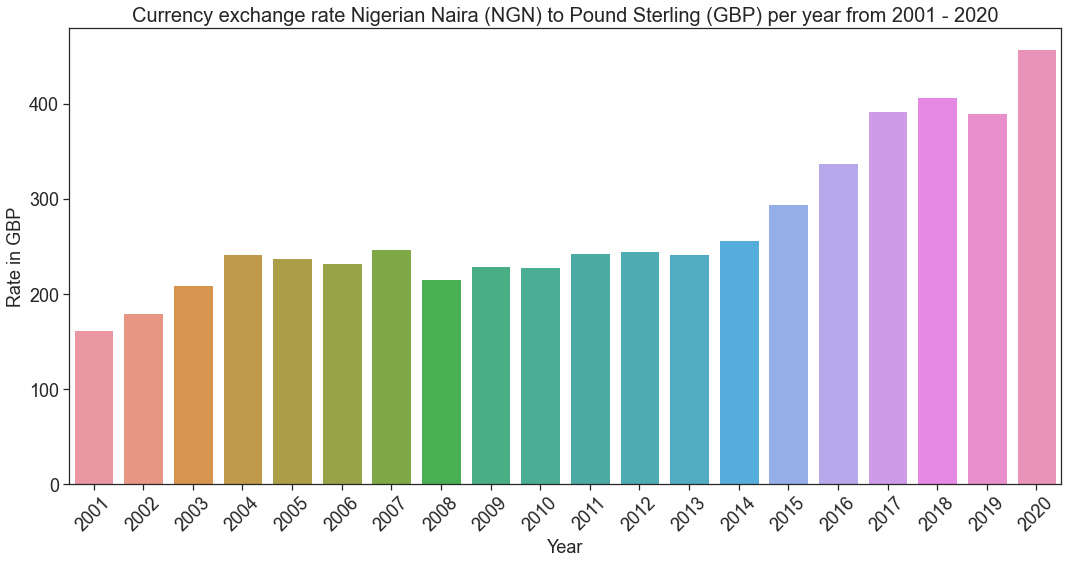

In [5]:
year = df["rate_year"]
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(data=df, x="rate_year", y="buying_rate")

plt.title("Currency exchange rate Nigerian Naira (NGN) to Pound Sterling (GBP) per year from 2001 - 2020", fontsize=20) 
plt.ylabel("Rate in GBP", fontsize=18)
plt.xlabel("Year", fontsize=18)
plt.tick_params(labelsize=18) 
plt.xticks(rotation = 45)
plt.tight_layout()

#plt.legend(loc="best", fontsize=18)
#plt.xlim(2001,2020)

In [6]:
df.shape

(20, 2)

In [7]:
#df = df[10:]

In [8]:
year = df["rate_year"]

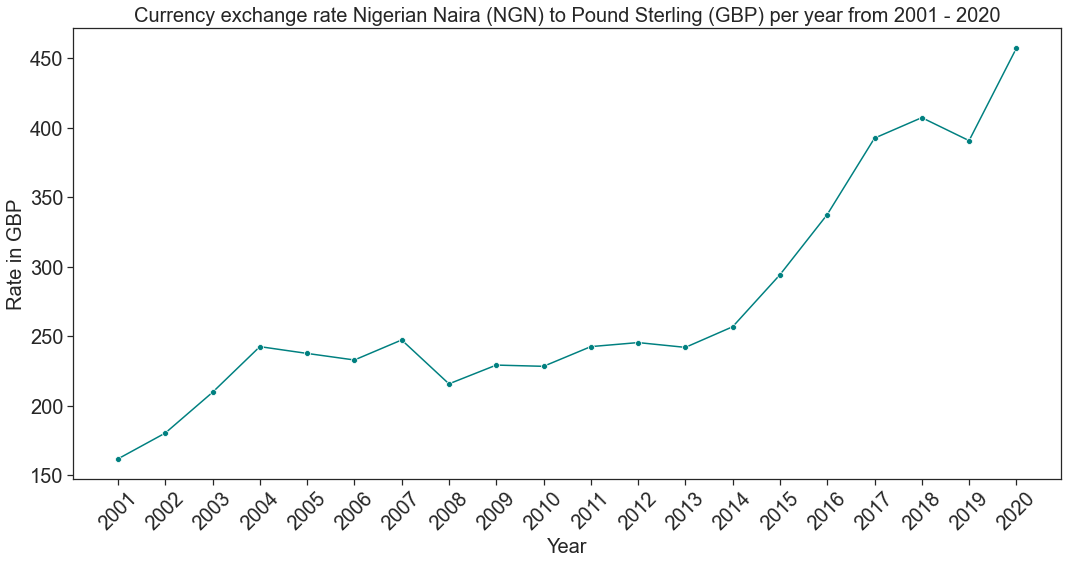

In [9]:
fig, ax = plt.subplots(figsize=(15,8))

sns.lineplot(data=df, x="rate_year", y="buying_rate", color="teal", marker="o")

plt.title("Currency exchange rate Nigerian Naira (NGN) to Pound Sterling (GBP) per year from 2001 - 2020", fontsize=20) 
plt.ylabel("Rate in GBP", fontsize=20)
plt.xlabel("Year", fontsize=20)
plt.xticks(ticks=year, rotation = 45)
#plt.ylim(0,500)
#plt.xlim(2011,2020)
plt.tick_params(labelsize=20) 
plt.tight_layout()

In [10]:
#X = np.array(df["rate_year"]).reshape(-1, 1)
#y = np.array(df["buying_rate"]).reshape(-1, 1)

In [11]:
X = df[["rate_year"]]
y = df["buying_rate"]

In [12]:
#n = int(len(df) * 0.8)
#X_train, y_train  = df[:n]
#X_test, y_test =df[n:] 

In [13]:
n= int(len(df) * 0.8)

In [14]:
#uncomment this to use the first 80% for training and the final 20% for testing

#X_train = X[:n]
#y_train = y[:n]

#X_test = X[n:]
#y_test = y[n:]

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [16]:
X_test

,rate_year
18,2019
1,2002
19,2020
8,2009


In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lnr = LinearRegression()

In [19]:
lnr.fit(X_train, y_train)


LinearRegression()

In [20]:
y_pred = lnr.predict(X_test)

In [21]:
print(y_test)
print(y_pred)

18    390.736814
1     180.506688
19    457.157542
8     229.366047
Name: buying_rate, dtype: float64
[353.81869752 180.84557522 363.99358707 252.06980205]


In [22]:
from sklearn.metrics import mean_squared_error #to evaluate our accuracy of the model
from math import sqrt

In [23]:
rmse = sqrt(mean_squared_error(y_pred,y_test))
print(rmse)

51.3761746284878


In [24]:
y_test.mean()

314.4417728989813

In [25]:
round((rmse/y_test.mean() * 100), ndigits=0)

16.0

The rmse should be very significantly smaller than the mean of the test set. 
this means that - On average, our predictions are off by about X. 

In [26]:
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(lnr, X, y,
                              cv=5,
                              scoring="neg_mean_squared_error")

print("Average RMSE score:", sqrt(scores.mean()))

Average RMSE score: 64.11356073211459


In [27]:
round((sqrt(scores.mean())/y_test.mean() * 100), ndigits=0)

20.0

In [28]:
prediction = lnr.predict(X)
print(prediction)

[170.67068567 180.84557522 191.02046477 201.19535431 211.37024386
 221.54513341 231.72002295 241.8949125  252.06980205 262.2446916
 272.41958114 282.59447069 292.76936024 302.94424978 313.11913933
 323.29402888 333.46891842 343.64380797 353.81869752 363.99358707]


In [29]:
#print(X_train.shape)
#print(X_test.shape)

#print(y_train.shape)
#print(y_test.shape)

#print(y_pred.shape)

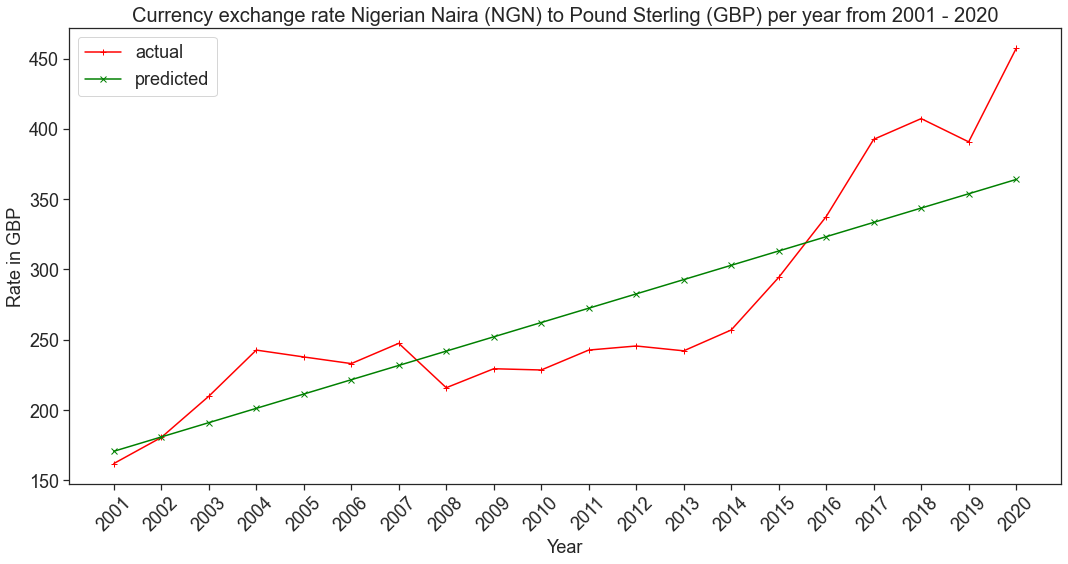

In [30]:
fig, ax = plt.subplots(figsize=(15,8))

plt.plot(X,y, color="red", marker="+", label="actual")  
plt.plot(X,prediction, color="green", marker="x", label="predicted") 
#plt.scatter(X_test,y_test)
#plt.scatter(X_test,y_pred)
plt.title("Currency exchange rate Nigerian Naira (NGN) to Pound Sterling (GBP) per year from 2001 - 2020", fontsize=20) 
plt.ylabel("Rate in GBP", fontsize=18)
plt.xlabel("Year", fontsize=18)
plt.xticks(ticks=year, rotation = 45)
#plt.xlim(2001,2020)
plt.tick_params(labelsize=18) 
plt.tight_layout()
plt.legend(loc="best", fontsize=18)

In [31]:
#Combine all plot comparing the different models
#plt.figure(figsize=(12,6))
#plt.scatter(month_year, y_fx, alpha=0.4)
#plt.plot(month_year, y_fx_predict, color='b')
#plt.plot(month_year, y_fx_predict_2, color='r')
#plt.plot(month_year, y_fx_predict_3, color='g')
#plt.legend(['1var', '2var', '3var'])
#plt.title("Linear Regression: AUD/USD Exchange Rate (3 var: Interest Rate, GDP & UER)")
#plt.xlabel("Month-Year")
#plt.ylabel("Exchange Rate")
#plt.xticks(fontsize=4)
#plt.show()

In [32]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
X_train_rd, X_test_rd, y_train_rd, y_test_rd = train_test_split(X, y, test_size=0.2, random_state=0)

In [34]:
rdm = RandomForestRegressor()

In [35]:
rdm.fit(X_train_rd, y_train_rd)


RandomForestRegressor()

In [36]:
y_pred_rd = lnr.predict(X_test_rd)

In [37]:
print(y_test_rd)
print(y_pred_rd)

18    390.736814
1     180.506688
19    457.157542
8     229.366047
Name: buying_rate, dtype: float64
[353.81869752 180.84557522 363.99358707 252.06980205]


In [38]:
rmse_rd = sqrt(mean_squared_error(y_pred_rd,y_test_rd))
print(rmse_rd)

51.3761746284878


In [39]:
y_test_rd.mean()

314.4417728989813

In [40]:
round((rmse_rd/y_test_rd.mean() * 100), ndigits=0)

16.0

In [41]:
prediction_rd = rdm.predict(X)
print(prediction_rd)

[183.75595965 183.75595965 217.09790446 232.04857266 238.08525172
 235.70364438 240.2322539  224.80300929 221.26245654 231.21460356
 238.5860082  244.91458928 243.97185396 254.34511412 287.82320799
 330.51850329 377.02368076 393.91811295 393.91811295 393.91811295]


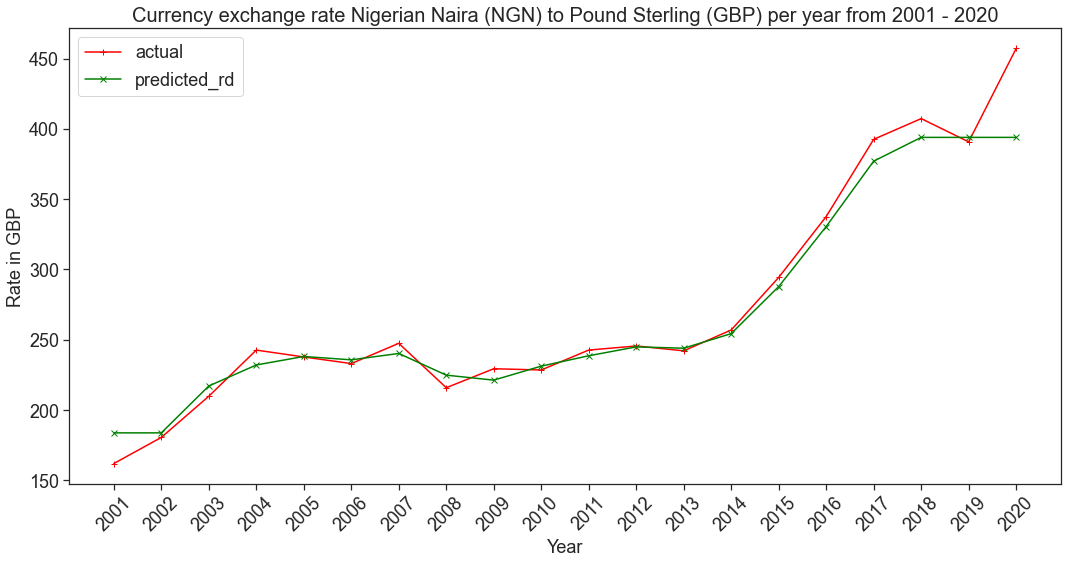

In [42]:
fig, ax = plt.subplots(figsize=(15,8))

plt.plot(X,y, color="red", marker="+", label="actual")  
plt.plot(X,prediction_rd, color="green", marker="x", label="predicted_rd") 
#plt.scatter(X_test,y_test)
#plt.scatter(X_test,y_pred)
plt.title("Currency exchange rate Nigerian Naira (NGN) to Pound Sterling (GBP) per year from 2001 - 2020", fontsize=20) 
plt.ylabel("Rate in GBP", fontsize=18)
plt.xlabel("Year", fontsize=18)
plt.xticks(ticks=year, rotation = 45)
#plt.xlim(2001,2020)
plt.tick_params(labelsize=18) 
plt.tight_layout()
plt.legend(loc="best", fontsize=18)

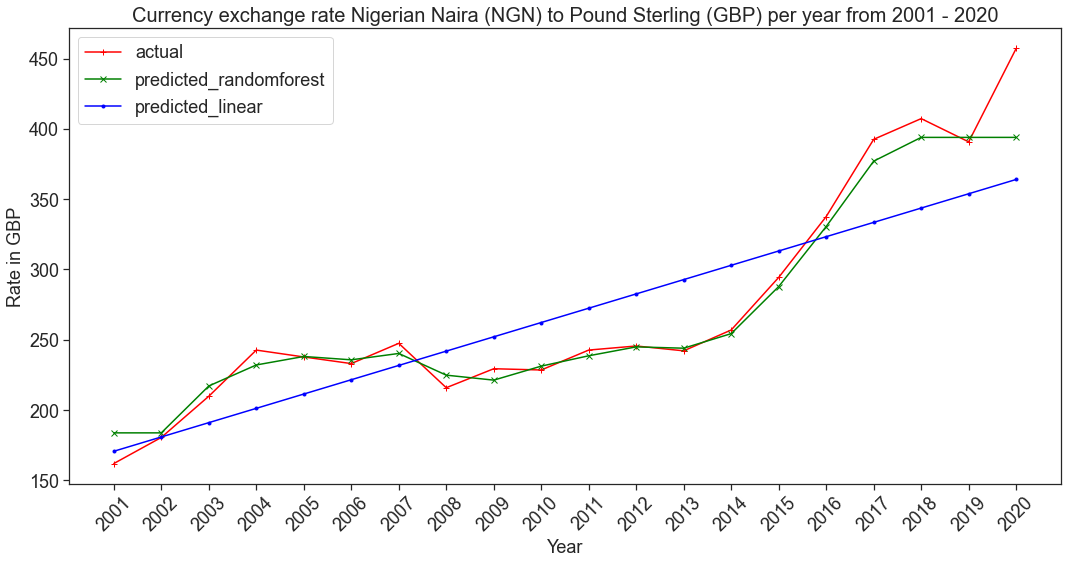

In [43]:
fig, ax = plt.subplots(figsize=(15,8))

plt.plot(X,y, color="red", marker="+", label="actual")  
plt.plot(X,prediction_rd, color="green", marker="x", label="predicted_randomforest") 
plt.plot(X,prediction, color="blue", marker=".", label="predicted_linear") 
#plt.scatter(X_test,y_test)
#plt.scatter(X_test,y_pred)
plt.title("Currency exchange rate Nigerian Naira (NGN) to Pound Sterling (GBP) per year from 2001 - 2020", fontsize=20) 
plt.ylabel("Rate in GBP", fontsize=18)
plt.xlabel("Year", fontsize=18)
plt.xticks(ticks=year, rotation = 45)
#plt.xlim(2001,2020)
plt.tick_params(labelsize=18) 
plt.tight_layout()
plt.legend(loc="best", fontsize=18)

In [44]:
X 

,rate_year
0,2001
1,2002
2,2003
3,2004
4,2005
5,2006
6,2007
7,2008
8,2009
9,2010


In [45]:
Future = pd.DataFrame(np.array([2021,2022,2023,2024,2025]),
                     columns=["rate_year"]
                     )

In [46]:
Future

,rate_year
0,2021
1,2022
2,2023
3,2024
4,2025


In [47]:
lnr.predict(Future)

array([374.16847661, 384.34336616, 394.51825571, 404.69314525,
       414.8680348 ])

In [48]:
rdm.predict(Future) 

array([393.91811295, 393.91811295, 393.91811295, 393.91811295,
       393.91811295])

In [49]:
lnr.coef_

array([10.17488955])

In [50]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

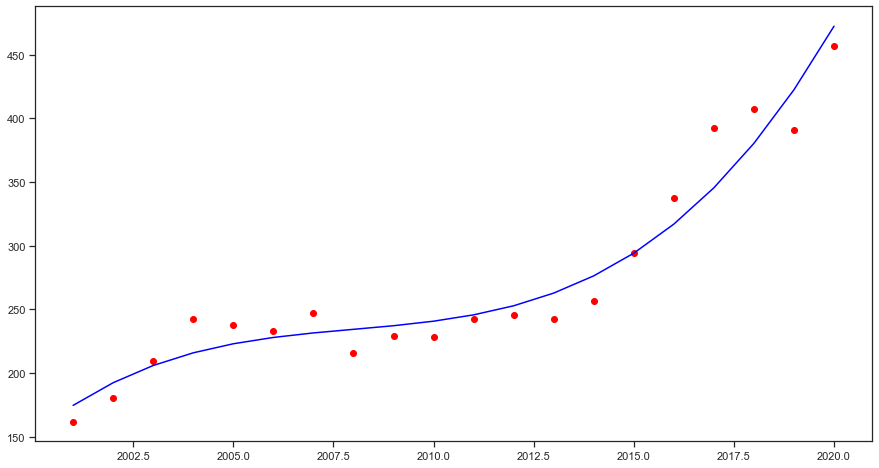

In [51]:
fig, ax = plt.subplots(figsize=(15,8))
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')

In [55]:
y_pred_pl = lin_reg_2.predict(poly_reg.fit_transform(X))
print(y_pred_pl)

[174.63843906 192.43456161 205.95415556 215.91030455 223.01609325
 227.98460603 231.52892637 234.36213911 237.19732833 240.74757743
 245.72597194 252.845595   262.81953192 276.36086595 294.18268108
 316.99806225 345.52009344 380.46185899 422.53644252 472.45692837]


In [56]:
print(y)

0     161.940985
1     180.506688
2     209.806118
3     242.630631
4     237.747661
5     233.030476
6     247.438658
7     215.870029
8     229.366047
9     228.479425
10    242.647682
11    245.548289
12    242.100664
13    256.933370
14    294.332092
15    337.608406
16    392.530362
17    407.270215
18    390.736814
19    457.157542
Name: buying_rate, dtype: float64


In [57]:
rmse_rd = sqrt(mean_squared_error(y_pred_pl,y))
print(rmse_rd)

19.429207640252823
